# Description

It analyzes how consensus partitions generated before agree with the ensemble, and selects the best ones for downstream analyses.

# Modules loading

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
from IPython.display import display

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import conf

# Load consensus clustering results

In [3]:
CONSENSUS_CLUSTERING_DIR = Path(
    conf.RESULTS["CLUSTERING_DIR"], "consensus_clustering"
).resolve()

display(CONSENSUS_CLUSTERING_DIR)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/clustering/consensus_clustering')

In [4]:
input_file = Path(CONSENSUS_CLUSTERING_DIR, "consensus_clustering_runs.pkl").resolve()
display(input_file)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/clustering/consensus_clustering/consensus_clustering_runs.pkl')

In [5]:
consensus_clustering_results = pd.read_pickle(input_file)

In [6]:
consensus_clustering_results.shape

(413, 12)

In [7]:
consensus_clustering_results.head()

,method,partition,k,ari_mean,ari_median,ari_std,ami_mean,ami_median,ami_std,nmi_mean,nmi_median,nmi_std
0,scc_030,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,0.170172,0.016107,0.280429,0.182083,0.073948,0.241458,0.184787,0.076497,0.240941
1,scc_030,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",3,0.170593,0.016107,0.280689,0.198427,0.080792,0.247718,0.202181,0.083653,0.246786
2,scc_030,"[0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 3, 0, ...",4,0.162009,0.086061,0.197582,0.227147,0.204954,0.145220,0.232457,0.211766,0.145033
3,scc_030,"[1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4, 4, 1, 1, 1, ...",5,0.163732,0.087616,0.198028,0.238870,0.217941,0.145885,0.244974,0.225387,0.145597
4,scc_030,"[0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 5, 5, 0, 5, 0, ...",6,0.164568,0.088147,0.199509,0.250476,0.231739,0.150811,0.257361,0.238495,0.150334


# Explore best partition per k

In [8]:
_col0, _col1 = "ami_mean", "ami_median"

_tmp = (
    consensus_clustering_results.groupby("k")
    .apply(lambda x: x.sort_values(_col0, ascending=False).head(1))
    .sort_values(_col0, ascending=False)[["method", "k", _col0, _col1]]
)
display(_tmp.head(10))

,,method,k,ami_mean,ami_median
k,,,,,
42,394,eac_average_coassoc_matrix,42,0.286678,0.235437
41,393,eac_average_coassoc_matrix,41,0.286357,0.234567
40,392,eac_average_coassoc_matrix,40,0.286107,0.236326
48,400,eac_average_coassoc_matrix,48,0.286006,0.220101
17,192,scc_020,17,0.285774,0.207419
47,399,eac_average_coassoc_matrix,47,0.285558,0.220016
45,397,eac_average_coassoc_matrix,45,0.285463,0.227382
46,398,eac_average_coassoc_matrix,46,0.285450,0.227324
44,396,eac_average_coassoc_matrix,44,0.285375,0.227054


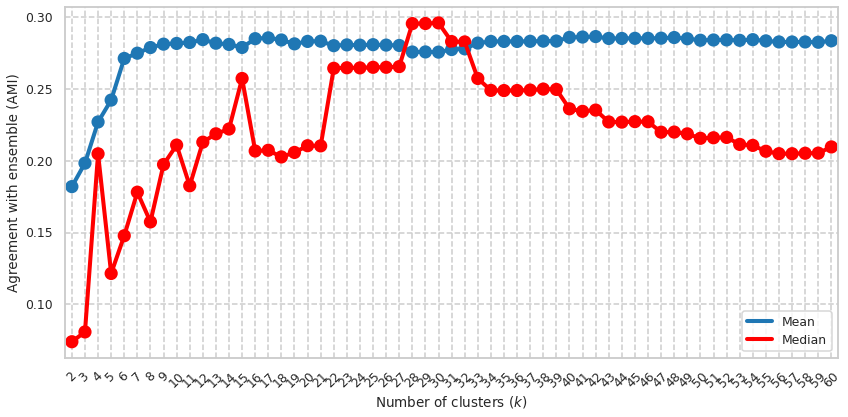

In [9]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig, ax = plt.subplots(figsize=(12, 6))
    ax = sns.pointplot(data=_tmp, x="k", y=_col0, ci=None, label="One")
    ax = sns.pointplot(
        data=_tmp, x="k", y=_col1, ci=None, color="red", label="Two", ax=ax
    )
    ax.set_ylabel("Agreement with ensemble (AMI)")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.legend(labels=["Mean", "Median"])
    plt.grid(True)
    plt.tight_layout()

# Select best partition per k

In [10]:
_measure_col = "ami_mean"

best_parts = (
    consensus_clustering_results.groupby("k")
    .apply(lambda x: x.sort_values(_measure_col, ascending=False).head(1))
    .sort_values(_measure_col, ascending=False)[
        ["method", "k", "partition", _measure_col]
    ]
)

In [11]:
best_parts = best_parts.set_index("k")

In [12]:
best_parts.shape

(59, 3)

In [13]:
# show partitions with top ARI
best_parts.head(10)

,method,partition,ami_mean
k,,,
42,eac_average_coassoc_matrix,"[25, 25, 25, 25, 25, 25, 25, 25, 25, 11, 25, 2...",0.286678
41,eac_average_coassoc_matrix,"[25, 25, 25, 25, 25, 25, 25, 25, 25, 11, 25, 2...",0.286357
40,eac_average_coassoc_matrix,"[25, 25, 25, 25, 25, 25, 25, 25, 25, 0, 25, 25...",0.286107
48,eac_average_coassoc_matrix,"[25, 25, 25, 25, 25, 25, 25, 25, 25, 6, 25, 25...",0.286006
17,scc_020,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.285774
47,eac_average_coassoc_matrix,"[25, 25, 25, 25, 25, 25, 25, 25, 25, 6, 25, 25...",0.285558
45,eac_average_coassoc_matrix,"[25, 25, 25, 25, 25, 25, 25, 25, 25, 2, 25, 25...",0.285463
46,eac_average_coassoc_matrix,"[25, 25, 25, 25, 25, 25, 25, 25, 25, 0, 25, 25...",0.285450
44,eac_average_coassoc_matrix,"[25, 25, 25, 25, 25, 25, 25, 25, 25, 5, 25, 25...",0.285375


In [14]:
best_parts.sort_values("k")

,method,partition,ami_mean
k,,,
2,scc_030,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.182083
3,scc_030,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.198427
4,scc_030,"[0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 3, 0, ...",0.227147
5,eac_average_coassoc_matrix,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.242396
6,scc_020,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.271421
7,eac_average_coassoc_matrix,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...",0.275095
8,scc_020,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.279020
9,eac_average_coassoc_matrix,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.281386
10,eac_average_coassoc_matrix,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.281896


## Select partitions with highest agreement

We do not expect all partitions with different `k` to be good ones. Thus, here I select the partitions with an ensemble agreement that pass a relative high threshold (75th percentile).

In [15]:
best_parts_stats = best_parts[_measure_col].describe()
display(best_parts_stats)

count    59.000000
mean      0.277623
std       0.019019
min       0.182083
25%       0.280593
50%       0.282933
75%       0.284321
max       0.286678
Name: ami_mean, dtype: float64

In [16]:
best_threshold = best_parts_stats["75%"]
best_threshold_description = "75th percentile"
display(best_threshold)

best_parts = best_parts.assign(
    selected=best_parts[_measure_col].apply(lambda x: x > best_threshold)
)

0.28432140734640315

In [17]:
best_parts.shape

(59, 4)

In [18]:
best_parts.head()

,method,partition,ami_mean,selected
k,,,,
42,eac_average_coassoc_matrix,"[25, 25, 25, 25, 25, 25, 25, 25, 25, 11, 25, 2...",0.286678,True
41,eac_average_coassoc_matrix,"[25, 25, 25, 25, 25, 25, 25, 25, 25, 11, 25, 2...",0.286357,True
40,eac_average_coassoc_matrix,"[25, 25, 25, 25, 25, 25, 25, 25, 25, 0, 25, 25...",0.286107,True
48,eac_average_coassoc_matrix,"[25, 25, 25, 25, 25, 25, 25, 25, 25, 6, 25, 25...",0.286006,True
17,scc_020,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.285774,True


## Save best partitions per k

In [19]:
output_file = Path(CONSENSUS_CLUSTERING_DIR, "best_partitions_by_k.pkl").resolve()
display(output_file)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/clustering/consensus_clustering/best_partitions_by_k.pkl')

In [20]:
best_parts.to_pickle(output_file)

# Plot of selected best partitions

In [21]:
plot_data = best_parts.reset_index()
display(plot_data.head(5))

,k,method,partition,ami_mean,selected
0,42,eac_average_coassoc_matrix,"[25, 25, 25, 25, 25, 25, 25, 25, 25, 11, 25, 2...",0.286678,True
1,41,eac_average_coassoc_matrix,"[25, 25, 25, 25, 25, 25, 25, 25, 25, 11, 25, 2...",0.286357,True
2,40,eac_average_coassoc_matrix,"[25, 25, 25, 25, 25, 25, 25, 25, 25, 0, 25, 25...",0.286107,True
3,48,eac_average_coassoc_matrix,"[25, 25, 25, 25, 25, 25, 25, 25, 25, 6, 25, 25...",0.286006,True
4,17,scc_020,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.285774,True


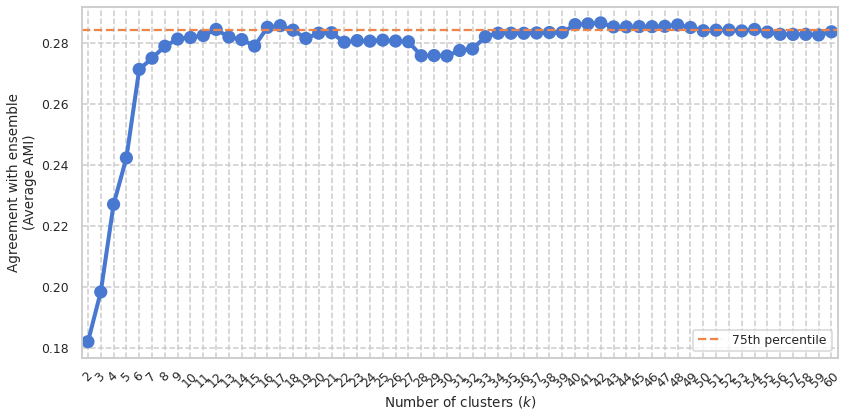

In [22]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
), sns.color_palette("muted"):
    current_palette = iter(sns.color_palette())

    fig, ax = plt.subplots(figsize=(12, 6))
    ax = sns.pointplot(
        data=plot_data, x="k", y=_measure_col, color=next(current_palette)
    )
    ax.axhline(
        best_threshold,
        ls="--",
        color=next(current_palette),
        label=best_threshold_description,
    )
    ax.set_ylabel("Agreement with ensemble\n(Average AMI)")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

The horizontal line in the plot is the median of the average AMI; partitions above that line are marked as selected for downstream analysis

In [23]:
# this list shows the selected final partitions, and which methods achieved the highest agreement
plot_data[plot_data["selected"]].sort_values("k")

,k,method,partition,ami_mean,selected
12,12,eac_average_coassoc_matrix,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.284530,True
10,16,scc_020,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.285224,True
4,17,scc_020,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.285774,True
2,40,eac_average_coassoc_matrix,"[25, 25, 25, 25, 25, 25, 25, 25, 25, 0, 25, 25...",0.286107,True
1,41,eac_average_coassoc_matrix,"[25, 25, 25, 25, 25, 25, 25, 25, 25, 11, 25, 2...",0.286357,True
0,42,eac_average_coassoc_matrix,"[25, 25, 25, 25, 25, 25, 25, 25, 25, 11, 25, 2...",0.286678,True
9,43,eac_average_coassoc_matrix,"[25, 25, 25, 25, 25, 25, 25, 25, 25, 5, 25, 25...",0.285371,True
8,44,eac_average_coassoc_matrix,"[25, 25, 25, 25, 25, 25, 25, 25, 25, 5, 25, 25...",0.285375,True
6,45,eac_average_coassoc_matrix,"[25, 25, 25, 25, 25, 25, 25, 25, 25, 2, 25, 25...",0.285463,True
7,46,eac_average_coassoc_matrix,"[25, 25, 25, 25, 25, 25, 25, 25, 25, 0, 25, 25...",0.285450,True


Evidence accumulation approaches (EAC) based on hierarchical clustering (such as `eac_average_coassoc_matrix` and `eac_single_coassoc_matrix`) pick the best partitions for lower `k` values, whereas spectral clustering does it better for all the rest.